## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Relaxometry of Femoral Knee Cartilage](https://sbonaretti.github.io/pyKNEEr/relaxometry.html)
# Exponential and linear fitting

- *Exponential* fitting is computationally expensive but more accurate
- *Linear fitting* is faster as data are transformed to their log and then linearly interpolated. However, linear fitting is less accurate because the nonlinear logaritmic transform provides larger weight to outliers  

The fitting is computed:  
- *directly* on the acquired images or after *rigid registration* of the following echo to the first echo  
- voxel-wise, i.e. for each voxel the Echo Times (dicom tag: (0018,0081)) are the x-variable and the voxel intensities in each acquisition are the y-variable
- only in the mask volume to have short computation time

## Import packages

In [1]:
from pykneer import pykneer_io         as io
from pykneer import relaxometry_for_nb as rel
import itk
import itkwidgets
from itkwidgets import view

## Image information

Inputs:   
- `input_file_name` contains the list of the images used to calculate the relaxation maps
- `method` is `0` if fitting is linear, `1` if fitting is exponential
- `registration_flag` is `0` for no registration, `1` for rigid registration
- `output_file_name` contains average and standard deviation of the fitting maps 

In [2]:
input_file_name   = "./image_list_relaxometry_fitting.txt"
method_flag       = 1  #0 = linear, 1 = exponential
registration_flag = 1 # 0 = no rigid registration, 1 = execute rigid registration
n_of_cores        = 1
output_file_name  = "exp_fit_aligned.csv"

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [3]:
image_data = io.load_image_data_fitting(input_file_name, method_flag, registration_flag)

-> information loaded for 1 subjects
-> for each subjects there are 4 acquisitions


## Calculate fitting maps

#### Align acquisitions 
Images are aligned rigidly to remove occational subject motion among acquisitions   

Note: This step is optional and can be skipped, given that:
 - When images are aligned, the fitting is calculated on interpolated values obtained with rigid registration
 - When images are not aligned, the fitting is calculated on original intensities, but images might not be aligned

In [4]:
if registration_flag == 1:
    rel.align_acquisitions(image_data, n_of_cores)

-> 01_cubeQuant_01_orig.mha
-> Acquisitions aligned
-> The total time was 81.42 seconds (about 1 min)


#### Compute the fitting

In [5]:
rel.calculate_fitting_maps(image_data, n_of_cores)

-> using exponential fitting 
01_cubeQuant_01_orig.mha
-> Fitting maps calculated
-> The total time was 51.80 seconds (about 0 min)


## Visualize fitting maps

#### 2D MAP: For each image, fitting maps at medial and lateral compartments and flattened map
The flattened map is an average of neighnoring voxels projected on the bone surface side of the femoral cartilage

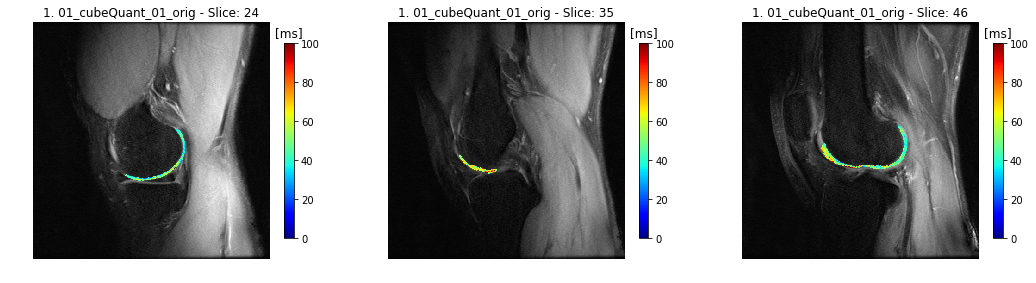

In [6]:
rel.show_fitting_maps(image_data)

#### 3D MAP: Interactive rendering of fitting maps
(The error message "Error creating widget: could not find model" can appear when the notebook is moved to a different folder)  
(If you get "Error displaying widget", [install](https://github.com/InsightSoftwareConsortium/itk-jupyter-widgets) the widget in the terminal by typing: `jupyter labextension install @jupyter-widgets/jupyterlab-manager itk-jupyter-widgets` and restart JupyterLab)

In [7]:
# ID of the map to visualize (The ID is the one in the 2D visualization above)
image_ID = 1 -1 # -1 because counting starts from 0

# read image
file_name = image_data[image_ID]["relaxometryFolder"] + image_data[image_ID]["mapFileName"]
image = itk.imread(file_name)

# view
viewer = view(image, gradient_opacity=0.0, ui_collapsed=False, shadow=False)
viewer

Viewer(gradient_opacity=0.01, rendered_image=<itkImagePython.itkImageSS3; proxy of <Swig Object of type 'itkIm…

#### GRAPH: Dots represent the average value of fitting maps per image; bars represents the standard deviation

<Figure size 1296x576 with 0 Axes>

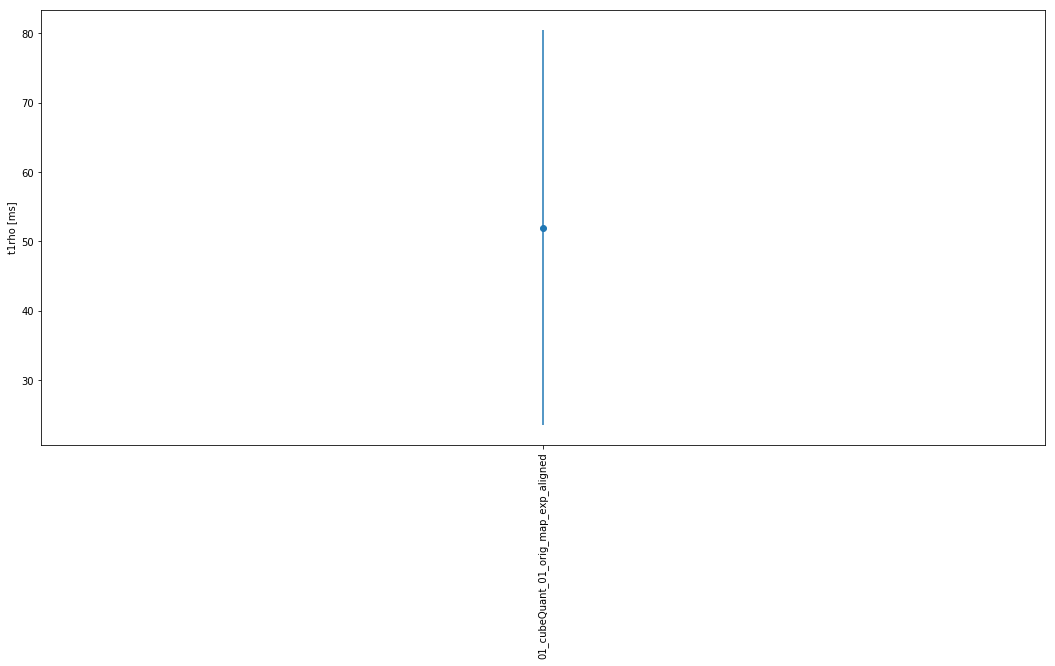

In [8]:
rel.show_fitting_graph(image_data)

#### TABLE: Average and standard deviation of fitting maps per image
The table is saved as a .csv file for subsequent analyisis

In [9]:
rel.show_fitting_table(image_data, output_file_name)

Table saved as: exp_fit_aligned.csv


,subjects,average,std.dev
1,01_cubeQuant_01_orig_map_exp_aligned.mha,51.98,28.5


### References

[1] Borthakur A., Wheaton A.J., Gougoutas A.J., Akella S.V., Regatte R.R., Charagundla S.R., Reddy R. [*In vivo measurement of T1rho dispersion in the human brain at 1.5 tesla.*](https://www.ncbi.nlm.nih.gov/pubmed/15065163) J Magn Reson Imaging. Apr;19(4):403-9. 2004.  
[2] Li X., Benjamin Ma C., Link T.M., Castillo D.D., Blumenkrantz G., Lozano J., Carballido-Gamio J., Ries M., Majumdar S. [*In vivo T1ρ and T2 mapping of articular cartilage in osteoarthritis of the knee using 3 T MRI.*](https://www.ncbi.nlm.nih.gov/pubmed/17307365) Osteoarthritis Cartilage. Jul;15(7):789-97. 2007.  

### Dependencies

In [10]:
%load_ext watermark
print ("elastix 4.8.0\n")
%watermark -v -m -p SimpleITK,matplotlib,numpy,pandas,scipy,itkwidgets,multiprocessing

elastix 4.8.0

CPython 3.7.1
IPython 7.2.0

SimpleITK unknown
matplotlib 2.2.3
numpy 1.16.1
pandas 0.24.1
scipy 1.2.1
itkwidgets 0.16.1
multiprocessing unknown

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
